<a href="https://colab.research.google.com/github/bhaveshwadhwani/Deep-Learning-Practice/blob/master/Sentiment_Analysis_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.datasets import imdb
import keras as K
import numpy as np

In [0]:
max_words = 20000

(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=max_words)

max_review_length = 80
train_x = K.preprocessing.sequence.pad_sequences(train_x, truncating='pre', padding='pre', maxlen=max_review_length)
test_x = K.preprocessing.sequence.pad_sequences(test_x, truncating='pre', padding='pre', maxlen=max_review_length)

In [6]:
model = Sequential()
embedding_length = 5
max_words = 1000
max_sentence_length = 10
model.add(Embedding(max_words, embedding_length, input_length=max_sentence_length))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be
# no larger than max_words-1 (vocabulary size).
# now model.output_shape == (None, max_review_length, embedding_length), where None is the batch dimension.


input_array = np.random.randint(max_words, size=(2, max_sentence_length)) #train_x[0]
print(input_array, np.shape(input_array))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
#assert output_array.shape == (32, 10, 64)
print(output_array, np.shape(output_array))

[[857 438 393  93 139 534 668 463 261 358]
 [218 527 316  95 262 896 993 364  97 165]] (2, 10)
[[[ 0.04509321 -0.02859612  0.00480014 -0.03129796  0.02184549]
  [ 0.00520294 -0.04043989  0.00543876  0.04794722  0.03410072]
  [-0.03098614 -0.03418135  0.02200163  0.02159091 -0.02933758]
  [-0.01724041 -0.00956567 -0.02313908  0.00950081 -0.01286292]
  [ 0.03455046 -0.01045915 -0.01288861  0.00120128 -0.02053982]
  [-0.00894463  0.03714368 -0.00242865 -0.04765694 -0.03061371]
  [-0.04914039 -0.04116387  0.04262574 -0.02307246  0.02306057]
  [-0.00534276 -0.01312257  0.01208781 -0.02716889 -0.04742327]
  [ 0.00409328 -0.04019741  0.04840111  0.03821191 -0.00381142]
  [-0.01927583  0.00907371 -0.04869778  0.01575065  0.00592273]]

 [[ 0.03981725 -0.0393      0.03587988 -0.04039662  0.00762615]
  [-0.02384963 -0.02772249 -0.02346718 -0.03600768  0.01162814]
  [-0.03871809 -0.03252371  0.00178491 -0.04057872  0.03977976]
  [-0.0012093   0.01243594 -0.02523466 -0.02172666  0.00013356]
  [ 0.0

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 5)             5000      
Total params: 5,000
Trainable params: 5,000
Non-trainable params: 0
_________________________________________________________________


# One hot representation

In [8]:
from keras.preprocessing.text import one_hot

#define documents
docs = ['glass of orange juice',
        'bottle of mango juice',
        'glass of mango shake',
        'drink bottle of banana shake',
        'I want a glass of cold water',
        'The king and the queen',
        'man and woman']

vocab_size = 10000

encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[5793, 1980, 9097, 6164], [2203, 1980, 3696, 6164], [5793, 1980, 3696, 4473], [808, 2203, 1980, 9169, 4473], [3973, 4730, 1348, 5793, 1980, 5580, 4907], [6672, 9258, 9781, 6672, 7702], [4989, 9781, 9394]]


# Word Embeddings

In [9]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM

import numpy as np

embedding_length = 5
max_doc_len = 10

encoded_docs = pad_sequences(encoded_docs, truncating='post', padding='post', maxlen=max_doc_len)

print(encoded_docs)


[[5793 1980 9097 6164    0    0    0    0    0    0]
 [2203 1980 3696 6164    0    0    0    0    0    0]
 [5793 1980 3696 4473    0    0    0    0    0    0]
 [ 808 2203 1980 9169 4473    0    0    0    0    0]
 [3973 4730 1348 5793 1980 5580 4907    0    0    0]
 [6672 9258 9781 6672 7702    0    0    0    0    0]
 [4989 9781 9394    0    0    0    0    0    0    0]]


In [10]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_length, input_length=max_doc_len))
model.add(LSTM(units=64))

model.compile('rmsprop', 'mse')

model.summary()

output = model.predict(encoded_docs)
print(output.shape)
print(output)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 5)             50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                17920     
Total params: 67,920
Trainable params: 67,920
Non-trainable params: 0
_________________________________________________________________
(7, 64)
[[ 3.13950283e-03  1.01015996e-02 -3.34638683e-03  3.62809398e-03
   2.53106724e-03 -1.72645567e-04  5.74721396e-03 -5.05846110e-04
   3.20605794e-03  1.80277973e-03  4.35359962e-03 -9.13916156e-04
  -2.01384677e-03  2.25054659e-03  5.14183380e-03  4.39426303e-03
   2.94907088e-03 -6.26531104e-03 -3.09693953e-03  2.92964815e-03
  -5.71163697e-03 -4.24521696e-03 -5.90404496e-04  3.42577300e-03
  -5.54022286e-03 -3.94582003e-03  7.25543476e-04 -2.22150492e-03
  -1.17151234e-02  3.50075937e-03  3.51631

##Putting it together
#Sentiment Analysis in Keras

Import libraries and dataset

In [11]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_words = 20000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


Pre-processing

In [12]:
# cut texts after this number of words (among top max_features most common words)
max_review_length = 80

x_train = sequence.pad_sequences(x_train, truncating='pre', padding='pre', maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, truncating='pre', padding='pre', maxlen=max_review_length)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


Build the model

In [13]:
print('Build model...')
embedding_length = 64
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_length, input_length=max_review_length))
model.add(LSTM(units=64, input_shape=(max_review_length, embedding_length), return_sequences=False, unroll=True))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Build model...

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Visualize the model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 80, 64)            1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,313,089
Trainable params: 1,313,089
Non-trainable params: 0
_________________________________________________________________


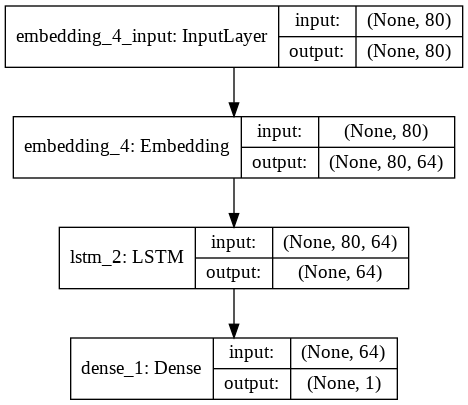

In [14]:
#Visualize
model.summary()

from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='sent_analysis_model.png')

Train the model

In [16]:
print('Training...')
batch_size = 32

model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs=10,
          validation_data = (x_test, y_test))

Training...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 64s 3ms/step - loss: 0.3652 - acc: 0.8392 - val_loss: 0.3630 - val_acc: 0.8390
Epoch 2/10
25000/25000 [==============================] - 63s 3ms/step - loss: 0.2323 - acc: 0.9075 - val_loss: 0.3776 - val_acc: 0.8340
Epoch 3/10
25000/25000 [==============================] - 63s 3ms/step - loss: 0.1481 - acc: 0.9447 - val_loss: 0.5639 - val_acc: 0.8254
Epoch 4/10
25000/25000 [==============================] - 63s 3ms/step - loss: 0.1006 - acc: 0.9638 - val_loss: 0.5388 - val_acc: 0.8031
Epoch 5/10
25000/25000 [==============================] - 64s 3ms/step - loss: 0.0642 - acc: 0.9781 - val_loss: 0.5743 - val_acc: 0.7786
Epoch 6/10
25000/25000 [==============================] - 63s 3ms/step - loss: 0.0524 - acc: 0.9824 - val_loss: 0.7319 - val_acc: 0.8124
Epoch 7/10
25000/25000 [==============================] - 63s 3ms/step - loss: 0.0389 - acc: 0.9868 - val_loss: 0.80

Evaluate the model

In [17]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score = {score}')
print(f'Test accuracy = {acc}')

25000/25000 [==============================] - 14s 555us/step
Test score = 1.0638728787899017
Test accuracy = 0.80716


Making predictions with model

In [19]:
#review = "The movie was a great waste of time."
review = "It was a great movie."
print(f'New review = {review}')

d = imdb.get_word_index()
words = review.split()
review = []

for word in words:
  if word not in d:
    review.append(2)
  else:
    review.append(d[word] + 3)
  
print(f"review = {review}")

review = sequence.pad_sequences([review], truncating='pre', padding='pre', maxlen=80)

prediction = model.predict(review)
print(f'Prediction (0 = Negative, 1 = positive) = {prediction}')

New review = It was a great movie.
review = [2, 16, 6, 87, 2]
Prediction (0 = Negative, 1 = positive) = [[0.05725674]]
